In [ ]:
# This plots seeing values from HOSTS observations, obtained from https://lbti.ipac.caltech.edu/
# The purpose is to see under what conditions the phase loop has been able to close.

# Created 2020 July 10 by E.S.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [20]:
# read in HOSTS data
df_hosts = pd.read_csv("data/lbti_l2ob_1787.csv")

In [35]:
# read in Altair observation data
df_altair_pretrim = pd.read_csv('fizeau_altair_180507_metadata.csv')
# only use data from the Altair observation
df_altair = df_altair_pretrim.where(np.logical_and(df_altair_pretrim["FRAMENUM"]>4404,
                                                   df_altair_pretrim["FRAMENUM"]<11334))

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,80,81,84,88,92,149) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
bin_width = 0.03
n_bins_hosts = int(np.divide(np.nanmax(df_hosts["Seeing(arcsec)"])-np.nanmin(df_hosts["Seeing(arcsec)"]),bin_width))
n_bins_altair = int(np.divide(np.nanmax(df_altair["SEEING"])-np.nanmin(df_altair["SEEING"]),bin_width))

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


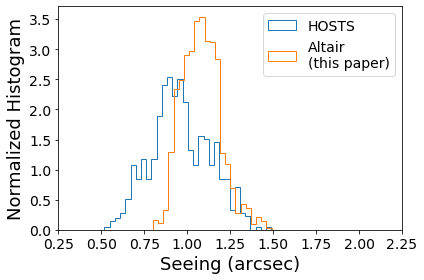

In [71]:
plt.hist(df_hosts["Seeing(arcsec)"],bins=n_bins_hosts,histtype="step",label="HOSTS",density=True)
plt.hist(df_altair["SEEING"],bins=n_bins_altair,histtype="step",label="Altair\n(this paper)",density=True)
plt.ylabel("Normalized Histogram", fontsize=18)
plt.xlabel("Seeing (arcsec)", fontsize=18)
plt.xlim([0.25,2.25])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("junk_seeing_hist.pdf")
#plt.show()

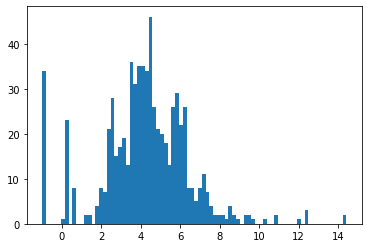

In [10]:
'''
plt.hist(df_altair["SMTTAU"],bins=80) # don't know if scaling is right
plt.hist(df["PWV"],bins=80)
plt.show()
'''